In [1]:
import sys
import datetime as dt
import cbpro
import time
import json
import pandas as pd
import technicalanalysis as ta

In [2]:
with open('/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/1 Personal/2 Finances/1 Bank/coinbasepro.json') as f:
    api = json.load(f)

auth_client = cbpro.AuthenticatedClient(api['api_key'], api['api_secret'], api['passphrase'])


In [3]:
product = 'BTC-USD'
currency = 'BTC'
period = 3600

In [21]:
# Here we get price for that last day
# getting historical data
prices = pd.DataFrame()
end = dt.datetime.utcnow()
start = end - dt.timedelta(days=1)
historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
prices = pd.concat((prices, historicData))

# adding two other days of data
for i in range(2):
    time.sleep(1)
    end = start
    start = end - dt.timedelta(days=1)
    historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
    historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
    prices = pd.concat((prices, historicData))
    
# converting to readable date
prices.date = pd.to_datetime(prices['date'], unit='s')
prices = prices.sort_values('date').reset_index(drop=True)
prices['ico_id'] = currency
prices['ico_symbol'] = currency
prices = prices[['ico_id', 'ico_symbol', 'date', 'low', 'high', 'open', 'close', 'volume']]

In [37]:
ta.signals_stats(ta.sar(prices))

{'total_roi': -0.00966984910460833,
 'holding_roi': -0.03337138437665763,
 'accuracy': 0.0,
 'sortino': -1.0164032637785656,
 'max_drawdown': -0.04410604576296595,
 'volatility': 0.08408021751734061,
 'avg_roi': -0.00966424125050891,
 'best_roi': -0.007821382606162275,
 'win_avg_roi': nan,
 'worst_roi': -0.011507099894855544,
 'loss_avg_roi': -0.00966424125050891,
 'nb_trades': 2}

In [34]:
ta.get_trades(ta.sar(prices))

,date_buy,buy,date_sell,sell,roi
0,2021-03-21 13:00:00,57046.18,2021-03-22 00:00:00,56600.00,-0.007821
1,2021-03-22 06:00:00,57663.53,2021-03-22 13:00:00,56999.99,-0.011507


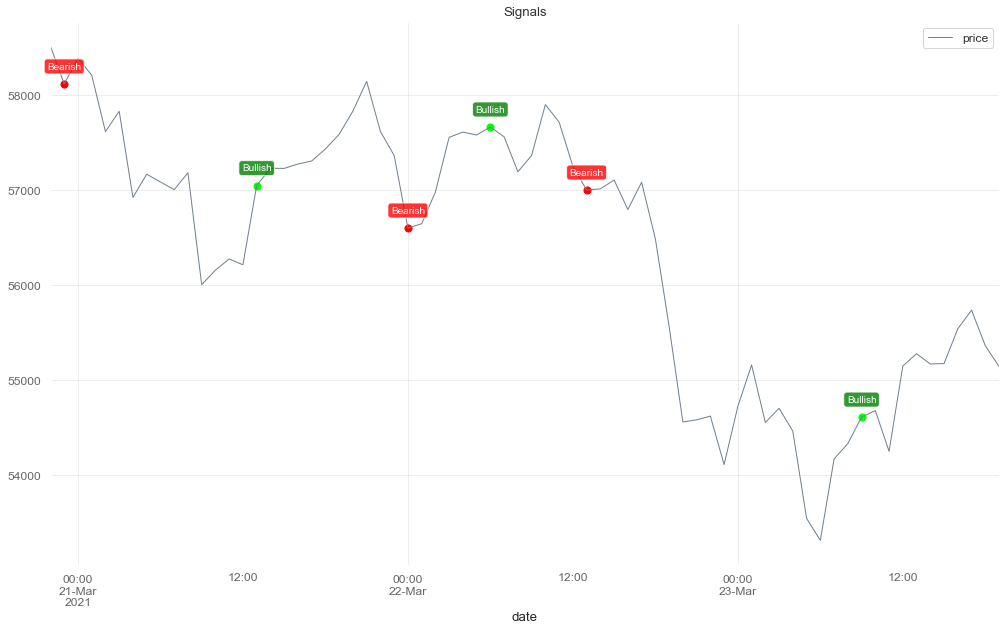

In [30]:
ta.plot_signals(ta.sar(prices))

In [35]:
coinbasepro_fee = .005
trades = ta.get_trades(ta.sar(prices))
first_buy = trades.iloc[0].buy
total_fees = (trades.buy.sum() + trades.sell.sum()) * coinbasepro_fee

fees_to_fund = total_fees / first_buy
fees_to_fund

0.020010954283003698

### Indicator


In [38]:
indicators = ['mama', 'frama', 'sar', 'bop', 'roc', 'adosc']
weights = [0.2768361581920904, 0.06779661016949153, 0.18361581920903955, 0.20056497175141244, 0.05649717514124294, 0.21468926553672316]
threshold = .5
comb = ta.CombinedIndicator(indicators, weights, threshold)
signals = comb.get_signals(prices)

ta.signals_stats(signals)

{'total_roi': -0.053978204103103944,
 'holding_roi': -0.04372018154282261,
 'accuracy': 0.0,
 'sortino': -5.578128690131807,
 'max_drawdown': -0.05782445015210946,
 'volatility': 0.10095261534665788,
 'avg_roi': -0.05345649147736875,
 'best_roi': -0.05345649147736875,
 'win_avg_roi': nan,
 'worst_roi': -0.05345649147736875,
 'loss_avg_roi': -0.05345649147736875,
 'nb_trades': 1}

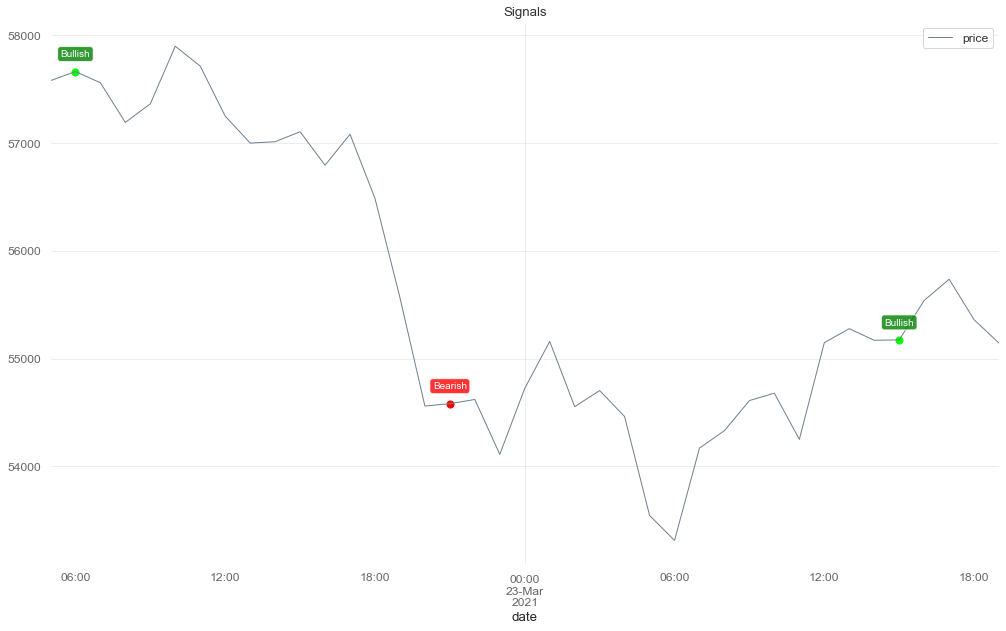

In [39]:
ta.plot_signals(signals)

In [32]:
coinbasepro_fee = .005
trades = ta.get_trades(signals)
first_buy = trades.iloc[0].buy
total_fees = (trades.buy.sum() + trades.sell.sum()) * coinbasepro_fee

fees_to_fund = total_fees / first_buy
fees_to_fund

0.009732717542613156